In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#Carregando arquivo csv

df = pd.read_csv('/datasets/games.csv')

In [3]:
#Observando se há valores nulos e se os tipos de dados estão corretos
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
#Para entender a aparência dos dados brutos,se os nomes das colunas estão corretos
print(df.head())

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


In [5]:
#Transformando o nome das colunas para minusculos
df.columns = [col.lower().replace(' ', '_') for col in df.columns]
print(df.head())


                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


In [6]:
#Tratar user_score: Converter para numérico, transformando 'tbd' em NaN e permitindo futuras operações matemáticas.

df['user_score'] = df['user_score'].replace('tbd', np.nan)
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB
None


Tratamento de Valores Ausentes:

Revisar as colunas com NaNs e pensar nas melhores estratégias:

1 name e genre (2 NaNs cada):

	Possíveis razões para ausência: Erro de registro, dados corrompidos, ou o jogo não foi totalmente catalogado.

    Abordagem: Em vez de remover essas linhas, o que resultaria na perda de dados de vendas potencialmente úteis, a melhor abordagem é preencher os NaNs com um valor categórico como 'Unknown'. Isso permite que essas linhas sejam retidas no DataFrame e sejam incluídas em análises agregadas (como vendas totais) sem atribuir um nome ou gênero incorreto.

2 year_of_release (269 NaNs):

    Possíveis razões para ausência: Informação não registrada, jogo muito antigo, ou simplesmente desconhecido.

    Abordagem: Manter esses NaNs na coluna year_of_release no DataFrame principal (df). Remover essas 269 linhas resultaria em perda de dados que poderiam ser valiosos para outras colunas. Ao deixá-los como NaN, eles serão naturalmente excluídos de análises que dependem de um ano específico (como o filtro para o df_relevant de 2013-2016), mas a linha do registro permanece no dataset completo para outras finalidades.
	

3 critic_score (8578 NaNs) e user_score (9125 NaNs):

	Possíveis razões para ausência:
*Jogos antigos: Muitos jogos mais antigos foram lançados antes que os sistemas de pontuação de críticos e usuários fossem tão difundidos.
*Jogos menos populares: Jogos com poucas vendas ou que não chamaram atenção podem não ter recebido avaliações suficientes.
*Dados não coletados/indisponíveis: Problemas na coleta dos dados ou as informações simplesmente não existiam nas fontes abertas.

	Abordagem: Preencher essas colunas com 0, média ou mediana pode ser problemático.

	0: Implicaria que o jogo teve uma pontuação péssima, o que não é o caso.

	Média/Mediana: Distorceria a distribuição e criaria uma falsa sensação de que esses jogos têm uma pontuação "média".

	Para a análise de correlação entre vendas e pontuações, só precisamos das linhas que têm pontuações.


	Decisão: Devido ao grande volume de NaNs e ao fato de que preencher com um valor arbitrário distorceria a análise de pontuações, é melhor deixar esses NaNs como estão por enquanto. Remover essas linhas resultaria em muitas perdas de dados de vendas (que estão completos), que podem ser úteis para outras análises.


4 rating (6766 NaNs):

	Possíveis razões para ausência: Assim como as pontuações, jogos mais antigos ou menos conhecidos podem não ter sido classificados pelo ESRB, ou a informação não foi registrada.

	Abordagem: Esta coluna é categórica. Preencher com a moda (a classificação mais comum) pode ser uma opção, mas pode ser enganoso. Uma alternativa é preencher com um valor como 'Unknown' ou 'No Rating'. Isso permite categorizar esses jogos sem atribuir uma classificação incorreta e ainda os inclue em análises de classificação. Para o objetivo da campanha, saber que um jogo não tem classificação pode ser uma informação útil.

In [7]:
# --- Tratamento de Valores Ausentes ---

# 1. Tratar 'user_score': substituir 'tbd' por NaN e converter para float

df['user_score'] = df['user_score'].replace('tbd', np.nan)
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')


# 2. Preencher NaN em 'name' e 'genre' com 'Unknown'

df['name'].fillna('Unknown', inplace=True)
df['genre'].fillna('Unknown', inplace=True)


# 3. Preencher NaN em 'rating' com 'No Rating'
df['rating'].fillna('No Rating', inplace=True)

# 4. 'year_of_release' e 'critic_score' / 'user_score'
# Manteremos os NaNs nessas colunas, pois as abordagens de preenchimento
# podem distorcer a análise ou não são adequadas (como media/mediana para ano).
# O filtro para 'df_relevant' irá naturalmente excluir anos nulos,
# e as análises de score já lidam com NaNs.

# 5. Converter 'year_of_release' para tipo inteiro (Int64 suporta NaNs)
# Se houver NaNs, Int64 é o tipo correto para manter a coluna como inteira.

df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce').astype('Int64')

# --- Verificação após o tratamento de NaNs e conversão ---
print("\n--- df.info() após o tratamento de NaN revisado e conversão de year_of_release: ---")
df.info()

print("\n--- Primeiras linhas do DataFrame após o tratamento de NaN: ---")
print(df.head())


--- df.info() após o tratamento de NaN revisado e conversão de year_of_release: ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB

--- Primeiras linhas do DataFrame após o tratamento de NaN: ---
                       name platform  year_of_release         genre  na_sales  \


In [8]:
#Calculando o total de vendas para cada jogo:
#Criando a coluna total_sales

df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
print(df.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score     rating  \
0     28.96      3.77         8.45          76.0         8.0          E   
1      3.58      6.81         0.77           NaN         NaN  No Rating   
2     12.76      3.79         3.29          82.0         8.3          E   
3     10.93      3.28         2.95          80.0         8.0          E   
4      8.89     10.22         1.00           NaN         NaN  No Rating   

   total_sales  
0        82.54  
1        40.24  
2        35

In [9]:
# Analisando os dados 
# Quantos jogos foram lançados a cada ano?
# Contando a ocorrencia de cada ano de lançamento

games_per_year = df['year_of_release'].value_counts().sort_index()

print("--- Número de jogos lançados por ano: ---")
print(games_per_year)

--- Número de jogos lançados por ano: ---
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: Int64


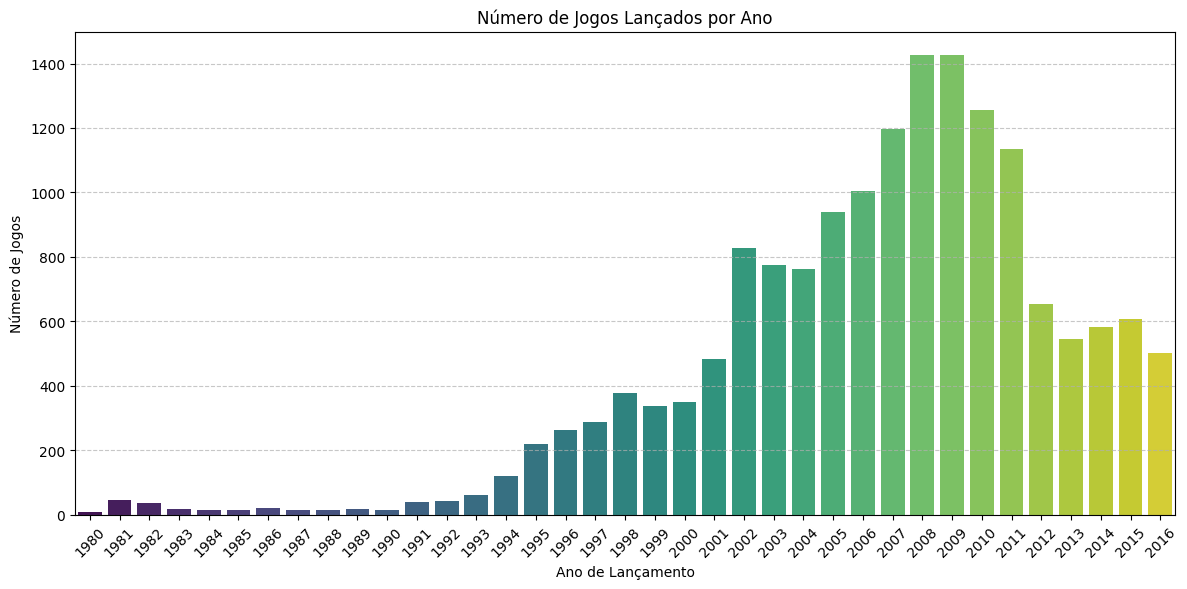

In [10]:
# Visualizando a distribuição de jogos por ano
plt.figure(figsize=(12, 6))
sns.barplot(x=games_per_year.index, y=games_per_year.values, palette='viridis')
plt.title('Número de Jogos Lançados por Ano')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Número de Jogos')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [11]:
# Como as vendas variaram de plataforma para plataforma?
# Vendas totais por plataforma

platform_total_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

print("\n--- Vendas totais por plataforma (Milhões de USD): ---")
print(platform_total_sales)



--- Vendas totais por plataforma (Milhões de USD): ---
platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64



--- Top 10 Plataformas por Vendas Totais: ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC'] ---

--- Vendas das Top Plataformas por Ano (Milhões de USD): ---
platform             DS    GBA     PC      PS     PS2     PS3     PS4    PSP  \
year_of_release                                                                
1985               0.02   0.00   0.04    0.00    0.00    0.00    0.00   0.00   
1988               0.00   0.00   0.03    0.00    0.00    0.00    0.00   0.00   
1992               0.00   0.00   3.03    0.00    0.00    0.00    0.00   0.00   
1994               0.00   0.00  12.87    6.03    0.00    0.00    0.00   0.00   
1995               0.00   0.00   4.22   35.96    0.00    0.00    0.00   0.00   
1996               0.00   0.00  10.58   94.70    0.00    0.00    0.00   0.00   
1997               0.00   0.00  11.27  136.17    0.00    0.00    0.00   0.00   
1998               0.00   0.00   3.26  169.49    0.00    0.00    0.00   0.00   
1999               0.0

<Figure size 1400x800 with 0 Axes>

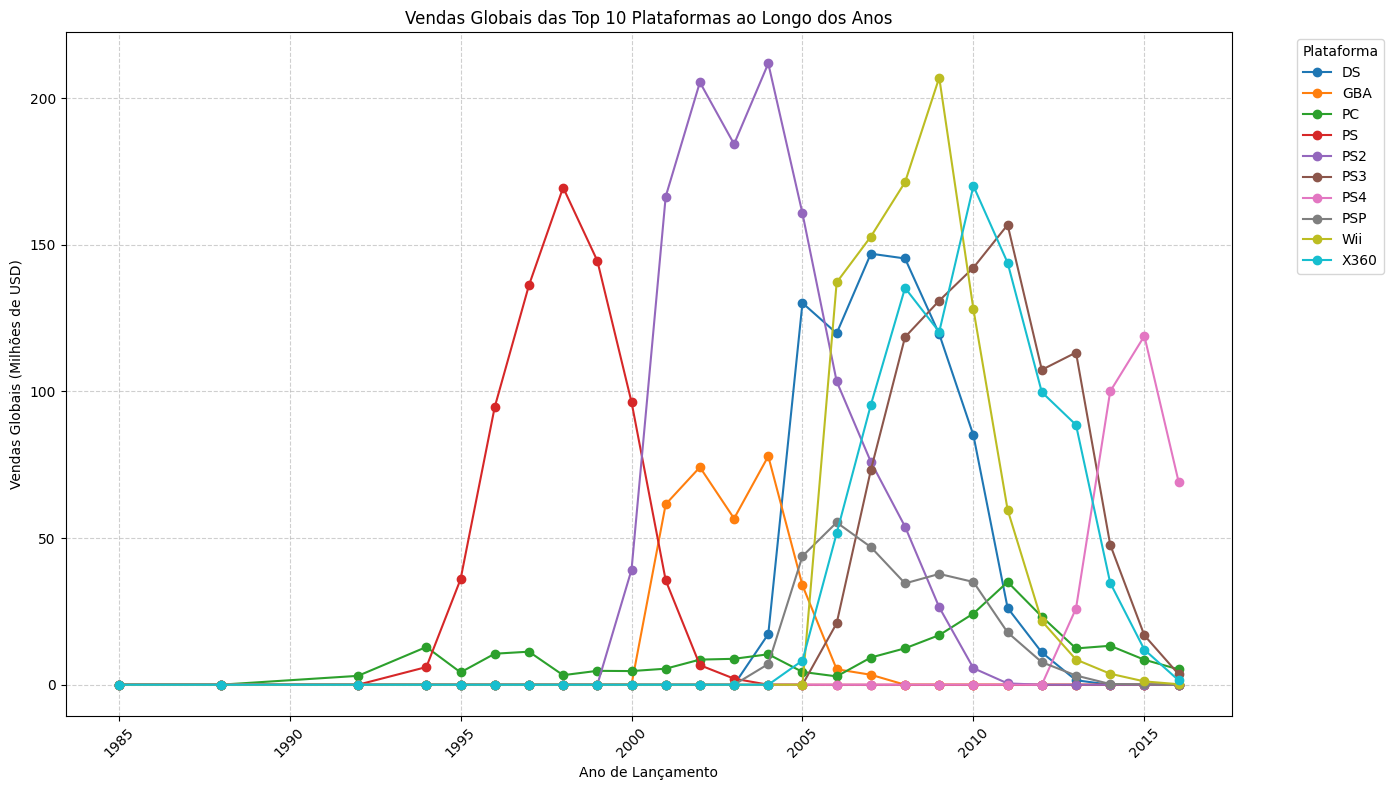

In [12]:
# Selecionando as 10 plataformas com as maiores vendas totais
top_platforms = platform_total_sales.head(10).index.tolist()
print(f"\n--- Top 10 Plataformas por Vendas Totais: {top_platforms} ---")

# Distribuição das vendas para as plataformas que mais venderam ao longo dos anos
# Filtrar o DataFrame para incluir apenas as plataformas top
df_top_platforms = df[df['platform'].isin(top_platforms)]

# Agrupar vendas por ano e plataforma
sales_by_year_platform = df_top_platforms.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack().fillna(0)

print("\n--- Vendas das Top Plataformas por Ano (Milhões de USD): ---")
print(sales_by_year_platform)

# Visualizando as vendas das top plataformas ao longo dos anos
plt.figure(figsize=(14, 8))
sales_by_year_platform.plot(kind='line', figsize=(14, 8), marker='o') # O erro deve desaparecer após a variável ser definida
plt.title('Vendas Globais das Top 10 Plataformas ao Longo dos Anos')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Vendas Globais (Milhões de USD)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Análise dos Dados e Definição do Período Relevante para 2017


	1. Número de jogos lançados por ano e a significância dos períodos:

	Ao observar o número de jogos lançados a cada ano, notamos uma clara evolução da indústria de jogos. Os anos iniciais (décadas de 1980 e início de 1990) mostram um volume de lançamentos relativamente baixo, indicando um mercado em desenvolvimento. A partir dos anos 2000, houve um crescimento expressivo, atingindo um pico notável em 2008 e 2009, com mais de 1.400 jogos lançados em cada um desses anos. Esse período pode ser considerado o auge da quantidade de títulos lançados anualmente em nosso conjunto de dados.

	Após 2009, o número de lançamentos anuais começou a declinar, com uma queda mais acentuada nos últimos anos presentes no conjunto de dados, como 2015 e 2016. Os dados dos anos mais recentes são cruciais para a nossa análise, pois refletem as tendências atuais do mercado. É importante ressaltar que os dados de 2016 são incompletos, o que contribui para a baixa contagem de jogos do ano em comparação com anos anteriores. Isso significa que, ao analisar a significância, os anos de pico (2008-2009) mostram o maior volume, mas os anos mais recentes (2013-2015) são mais relevantes para a previsão, apesar do volume decrescente.

	2. Variação das vendas por plataforma e o ciclo de vida:

	Analisamos as plataformas com as maiores vendas totais, que são: 'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP' e '3DS'.

	Ao observar a distribuição das vendas dessas plataformas ao longo dos anos, fica evidente o ciclo de vida dinâmico da indústria de videogames:

	Plataformas antigas que perderam vendas: plataformas como PS (PlayStation 1), PS2, DS, GBA e PSP tiveram seus picos de popularidade e vendas no passado, mas já não apresentam vendas significativas nos anos mais recentes. Por exemplo, o PS2 dominou o início dos anos 2000, mas suas vendas praticamente zeraram após 2011. O DS teve seu auge em meados dos anos 2000 e desapareceu após 2013/2014.
Plataformas em Declínio: Plataformas como Wii, X360 e PS3, embora muito populares em seus respectivos auges (Wii em 2009, X360 em 2010, PS3 em 2011), mostram um declínio acentuado em suas vendas após 2012-2013, apresentando volumes muito baixos em 2016. Isso indica que estão no fim de seus ciclos de vida ativos.
	
	Plataformas Atuais: O PS4 e o 3DS são exemplos de plataformas mais recentes no nosso conjunto de dados. O PS4, lançado em 2013, mostrou um crescimento rápido e vendas expressivas nos anos seguintes (2014, 2015), embora 2016 mostre uma queda que pode estar ligada à incompletude dos dados. O 3DS, lançado em 2011, manteve vendas consideráveis até 2016, embora em declínio.
Em geral, observamos que as plataformas de videogame têm um ciclo de vida ativo de vendas significativas de aproximadamente 5 a 10 anos. Uma nova plataforma geralmente leva cerca de 3 a 5 anos para atingir seu pico de vendas após o lançamento, e então começa um período de declínio à medida que novas gerações de hardware são introduzidas.

	3. Determinação do período televante para o modelo de 2017:

	Considerando que nosso objetivo é construir um modelo que preveja o comportamento do mercado em 2017, precisamos focar em dados que sejam mais relevantes para as tendências atuais, desconsiderando plataformas e períodos que não representam mais o cenário ativo da indústria.

	Com base na análise do ciclo de vida das plataformas e das tendências de vendas:

	O período de 2013 a 2016.
	Por que 2013 a 2016?

	Relevância Recente: Este período captura os anos mais recentes do nosso conjunto de dados, que são os mais indicativos das tendências futuras.
	Lançamento de Nova Geração: O ano de 2013 marca o lançamento de plataformas-chave da geração atual, como o PlayStation 4, que ainda estará ativo e relevante em 2017. Focar a partir deste ano nos permite concentrar nas dinâmicas das plataformas mais modernas e em seus respectivos ciclos de vida.
	Desconsideração de Dados Obsoletos: Ao ignorar dados anteriores a 2013, evitamos a influência de plataformas que já completaram seu ciclo de vida e não são mais representativas do mercado atual. Isso tornará nosso modelo mais focado e preciso para 2017.


    Embora incompletos, os dados de 2016 ainda oferecem uma visão do desempenho mais recente das plataformas, servindo como o ponto final para a nossa análise histórica relevante para a previsão.
Ao focar neste período, podemos identificar as plataformas que estão liderando as vendas, as que estão em crescimento ou declínio, e selecionar as mais promissoras para a campanha de 2017, ignorando o "ruído" de dados históricos que não são mais aplicáveis.



--- df.info() para o período relevante (2013-2016): ---
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   Int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           2233 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 229.0+ KB

--- Primeiras linhas do DataFrame filtrado: ---
                         name platform  year_of_release         genre  \
16   

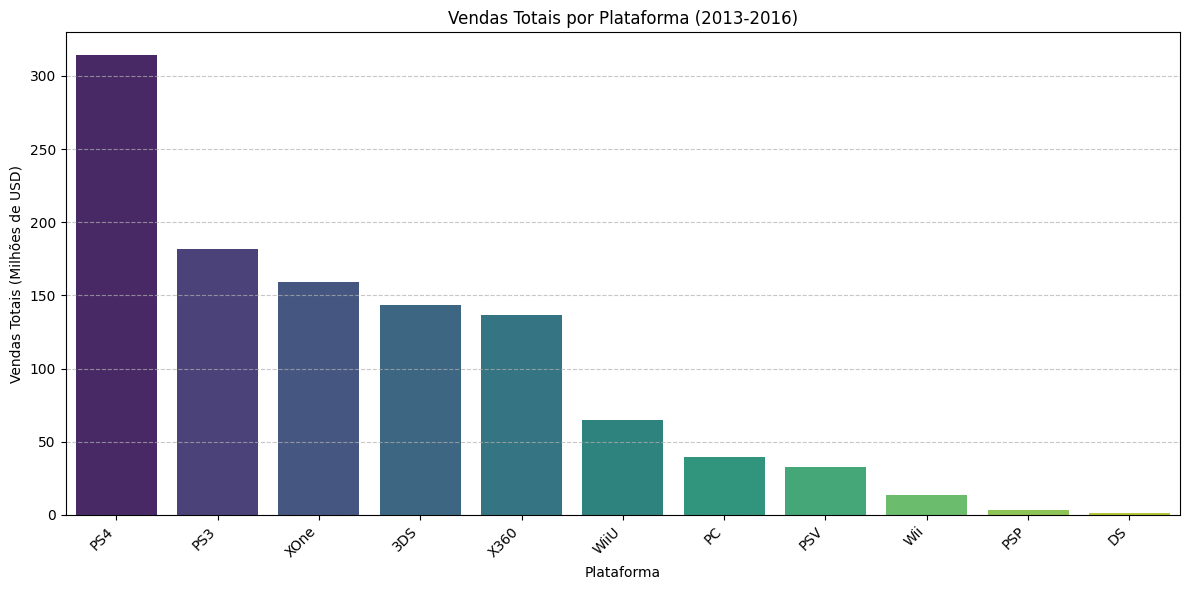


--- Top 5 Plataformas no Período 2013-2016: ['PS4', 'PS3', 'XOne', '3DS', 'X360'] ---

--- Vendas Anuais das Top Plataformas (2013-2016) (Milhões de USD): ---
platform           3DS     PS3     PS4   X360   XOne
year_of_release                                     
2013             56.57  113.25   25.99  88.58  18.96
2014             43.76   47.76  100.00  34.74  54.07
2015             27.78   16.82  118.90  11.96  60.14
2016             15.14    3.60   69.25   1.52  26.15


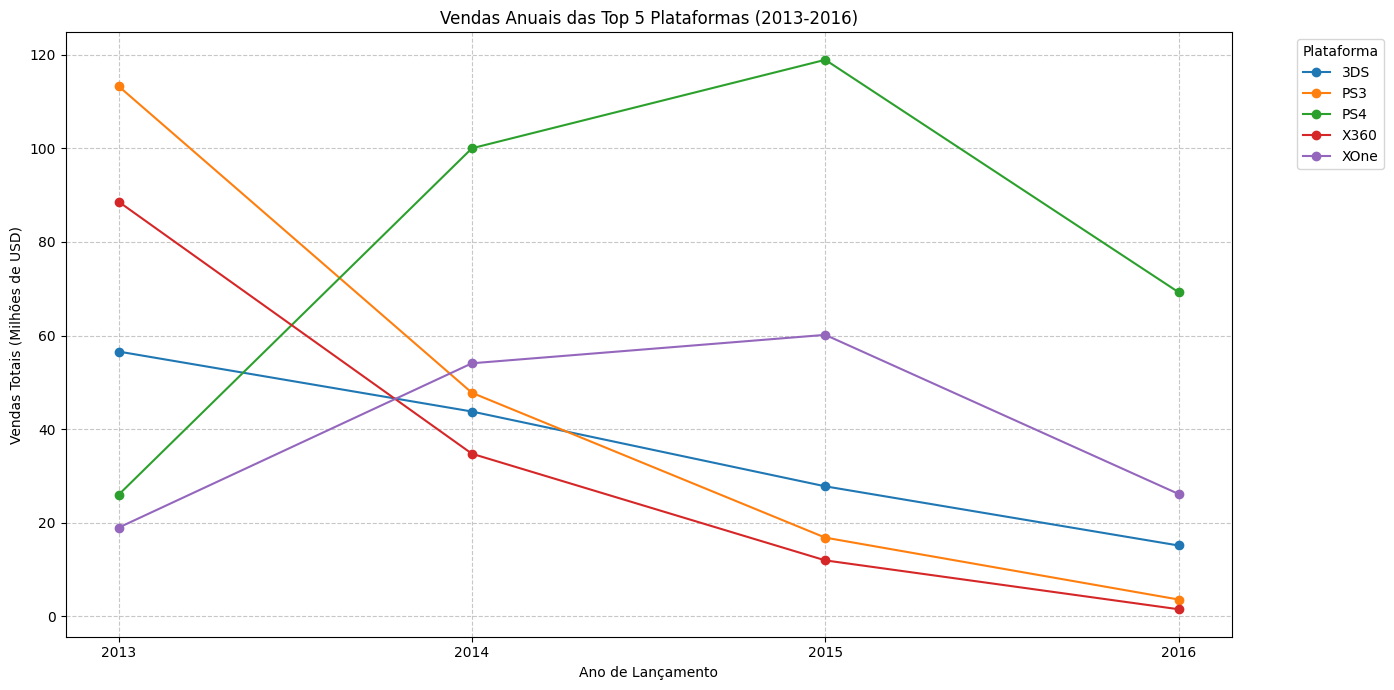

In [13]:
#Vendas totais por plataforma no período relevante (2013-2016)
# Filtrar o DataFrame para o período relevante (2013-2016)

df_relevant = df[(df['year_of_release'] >= 2013) & (df['year_of_release'] <= 2016)].copy()

print("--- df.info() para o período relevante (2013-2016): ---")
df_relevant.info()

print("\n--- Primeiras linhas do DataFrame filtrado: ---")
print(df_relevant.head())



platform_sales_relevant = df_relevant.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

print("\n--- Vendas Totais por Plataforma no Período 2013-2016 (Milhões de USD): ---")
print(platform_sales_relevant)

# Para analisar crescimento/declínio, vamos pegar as 5 plataformas mais vendidas neste período
top_platforms_relevant = platform_sales_relevant.head(5).index.tolist()
print(f"\n--- Top 5 Plataformas no Período 2013-2016: {top_platforms_relevant} ---")

# Vendas anuais para as top plataformas do período relevante para ver a tendência
sales_by_year_platform_relevant = df_relevant[df_relevant['platform'].isin(top_platforms_relevant)].groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack().fillna(0)

print("\n--- Vendas Anuais das Top Plataformas (2013-2016) (Milhões de USD): ---")
print(sales_by_year_platform_relevant)

# --- Vendas Totais por Plataforma no Período 2013-2016 (Milhões de USD): ---
platform_sales_relevant = df_relevant.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print("\n--- Vendas Totais por Plataforma no Período 2013-2016 (Milhões de USD): ---")
print(platform_sales_relevant)

# --- Adicionando o Gráfico de Barras para Vendas Totais por Plataforma ---
plt.figure(figsize=(12, 6))
sns.barplot(x=platform_sales_relevant.index, y=platform_sales_relevant.values, palette='viridis')
plt.title('Vendas Totais por Plataforma (2013-2016)')
plt.xlabel('Plataforma')
plt.ylabel('Vendas Totais (Milhões de USD)')
plt.xticks(rotation=45, ha='right') # Rotaciona os nomes das plataformas para melhor leitura
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show() 


# Para analisar crescimento/declínio, vamos pegar as 5 plataformas mais vendidas neste período
top_platforms_relevant = platform_sales_relevant.head(5).index.tolist()
print(f"\n--- Top 5 Plataformas no Período 2013-2016: {top_platforms_relevant} ---")

# Vendas anuais para as top plataformas do período relevante para ver a tendência
sales_by_year_platform_relevant = df_relevant[df_relevant['platform'].isin(top_platforms_relevant)].groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack().fillna(0)

print("\n--- Vendas Anuais das Top Plataformas (2013-2016) (Milhões de USD): ---")
print(sales_by_year_platform_relevant) # Usando to_markdown() para formatacao no chat

# --- Adicionando o Gráfico de Linhas para Vendas Anuais das Top Plataformas ---
plt.figure(figsize=(14, 7))
sales_by_year_platform_relevant.plot(kind='line', marker='o', ax=plt.gca()) # ax=plt.gca() para usar o subplot atual
plt.title('Vendas Anuais das Top 5 Plataformas (2013-2016)')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Vendas Totais (Milhões de USD)')
# --- MODIFICAÇÃO AQUI: Convertendo o índice para tipo int ---
plt.xticks(sales_by_year_platform_relevant.index.astype(int))
# -----------------------------------------------------------
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left') # Legenda fora do gráfico
plt.tight_layout()
plt.show()



Tendências de Crescimento/Declínio:

PS4: Lançado em 2013, demonstrou um forte crescimento de vendas até 2015. A queda em 2016 deve ser interpretada com cautela, pois os dados do ano estão incompletos. É a principal plataforma de crescimento e líder do mercado.

XOne: Lançado em 2013, também teve um crescimento consistente até 2015, com uma queda em 2016. É a principal concorrente do PS4 e também uma plataforma em ascensão na geração atual.

PS3 e X360: Ambas já eram plataformas da geração anterior e mostram um declínio acentuado em suas vendas ao longo do período 2013-2016. Em 2016, suas vendas são residuais.

3DS: Mostra um declínio consistente em suas vendas anuais desde 2013.



Plataformas Potencialmente Lucrativas para 2017:

PS4 e XOne: São as plataformas mais promissoras. Embora os dados de 2016 mostrem uma queda, ambas continuam a frente das demais. Forte indicativo para uma campanha em 2017, principalmente no caso da plataforma PS4. As demais plataformas estão em claro declínio.




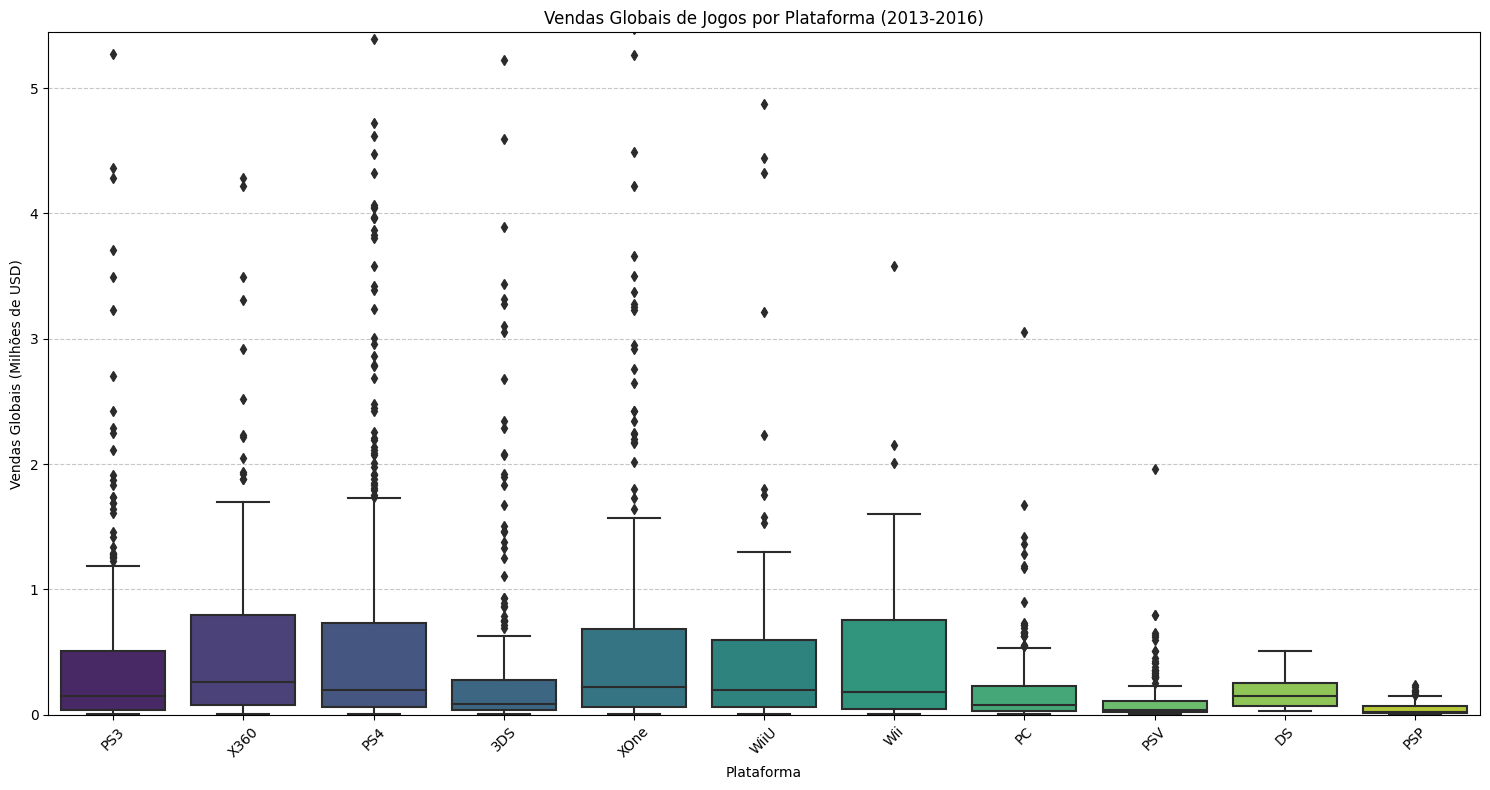


--- Vendas Médias por Jogo por Plataforma no Período 2013-2016 (Milhões de USD): ---
platform
PS4     0.801378
X360    0.735484
XOne    0.645020
Wii     0.593913
WiiU    0.562000
PS3     0.525884
3DS     0.472772
PC      0.208624
DS      0.192500
PSV     0.092151
PSP     0.052239
Name: total_sales, dtype: float64


In [14]:
# Box plot das vendas globais por plataforma no período relevante
plt.figure(figsize=(15, 8))
sns.boxplot(x='platform', y='total_sales', data=df_relevant, palette='viridis')
plt.ylim(0, df_relevant['total_sales'].quantile(0.99)) # Limitar o y-axis para melhor visualização, ignorando outliers extremos
plt.title('Vendas Globais de Jogos por Plataforma (2013-2016)')
plt.xlabel('Plataforma')
plt.ylabel('Vendas Globais (Milhões de USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Vendas médias por jogo por plataforma no período relevante
average_sales_per_platform = df_relevant.groupby('platform')['total_sales'].mean().sort_values(ascending=False)
print("\n--- Vendas Médias por Jogo por Plataforma no Período 2013-2016 (Milhões de USD): ---")
print(average_sales_per_platform)

    Análise do Box Plot e Vendas Médias:



	O box plot ilustra que a maioria dos jogos em todas as plataformas tem vendas globais relativamente baixas.
    A "caixa" (que representa 50% dos dados centrais) e a mediana (linha dentro da caixa) são tipicamente muito próximas do zero para a maioria das plataformas.
    Isso significa que pouquíssimos vendem milhões de cópias.
	Os "outliers" são muito proeminentes para plataformas como PS4, XOne, PS3 e X360. 
    Esses pontos representam os títulos de maior sucesso que impulsionam as vendas totais dessas plataformas.
As diferenças na distribuição das vendas são significativas. Algumas plataformas (como PS4 e XOne) mostram uma maior capacidade de gerar esses títulos de altíssima venda, enquanto outras (como PSP ou DS) têm caixas e outliers bem menores, indicando menos "hits" ou vendas mais modestas por título.
Vendas Médias por Jogo:

	PS4: ~$0.80 milhões por jogo
	X360: ~$0.74 milhões por jogo
	XOne: ~$0.65 milhões por jogo
	Wii: ~$0.59 milhões por jogo
	WiiU: ~$0.56 milhões por jogo


	As outras plataformas (PS3, 3DS, PC, PSV, PSP, DS) apresentam vendas médias por jogo significativamente mais baixas.
	É interessante notar que, embora PS3 e 3DS tivessem vendas totais altas no período, 
a venda média por jogo é menor que a de PS4, XOne e até X360. 
    Isso sugere que PS4 e XOne, por exemplo,não só são líderes em vendas totais mas também têm uma maior proporção de jogos de sucesso individualmente (ou um público mais propenso a comprar os jogos que são lançados).
    O PS4 se destaca com a maior venda média, confirmando seu potencial.


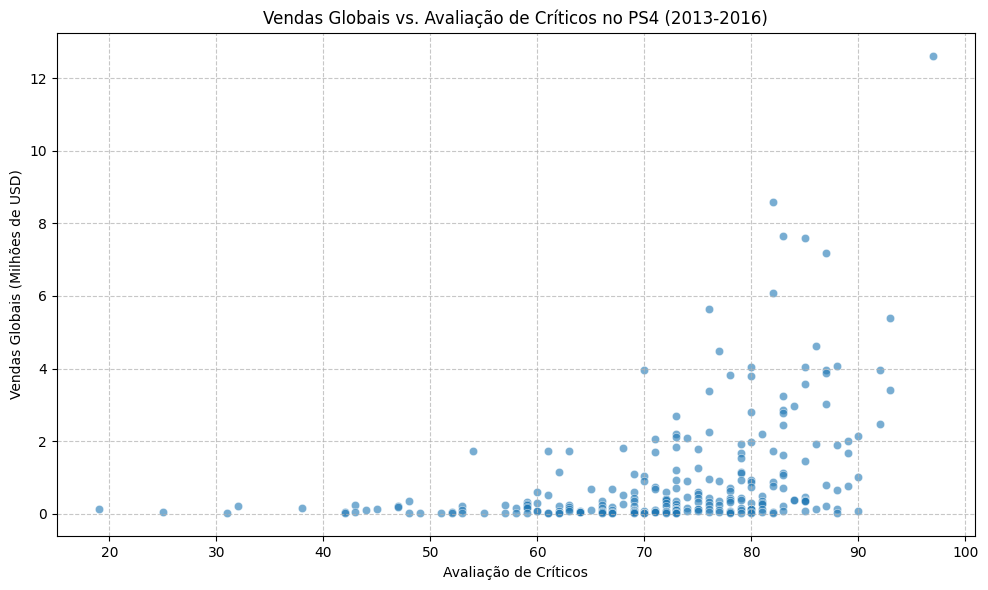

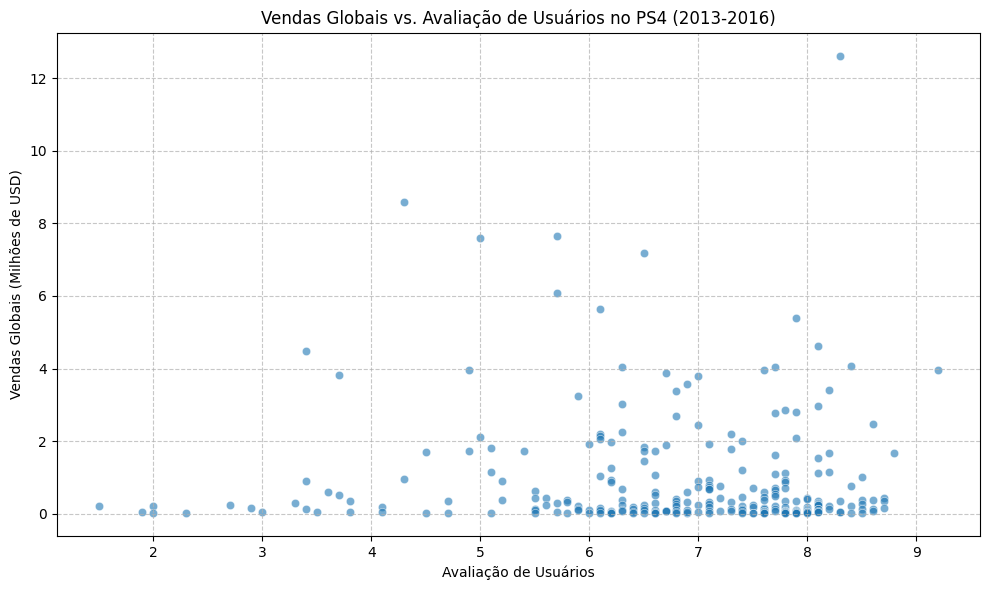


--- Correlação no PS4 (2013-2016): ---
Correlação entre Avaliação de Críticos e Vendas: 0.41
Correlação entre Avaliação de Usuários e Vendas: -0.03


In [15]:
# O PS4 foi escolhido por ser a plataforma líder em vendas no período de 2013-2016.

# Filtrar dados para a plataforma PS4 do DataFrame relevante (2013-2016)
ps4_data = df_relevant[df_relevant['platform'] == 'PS4']

# Gráfico de dispersão: critic_score vs. total_sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=ps4_data, alpha=0.6)
plt.title('Vendas Globais vs. Avaliação de Críticos no PS4 (2013-2016)')
plt.xlabel('Avaliação de Críticos')
plt.ylabel('Vendas Globais (Milhões de USD)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Gráfico de dispersão: user_score vs. total_sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='user_score', y='total_sales', data=ps4_data, alpha=0.6)
plt.title('Vendas Globais vs. Avaliação de Usuários no PS4 (2013-2016)')
plt.xlabel('Avaliação de Usuários')
plt.ylabel('Vendas Globais (Milhões de USD)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Calcular a correlação entre avaliações e vendas
critic_sales_corr = ps4_data['critic_score'].corr(ps4_data['total_sales'])
user_sales_corr = ps4_data['user_score'].corr(ps4_data['total_sales'])

print(f"\n--- Correlação no PS4 (2013-2016): ---")
print(f"Correlação entre Avaliação de Críticos e Vendas: {critic_sales_corr:.2f}")
print(f"Correlação entre Avaliação de Usuários e Vendas: {user_sales_corr:.2f}")

    Análise:

    Influência das Avaliações de Críticos:

    A correlação de 0.41 indica uma correlação positiva moderada entre a avaliação de críticos e as vendas globais de jogos no PS4.
    Isso significa que, em geral, jogos com pontuações mais altas dadas pelos críticos tendem a apresentar vendas maiores. Embora não seja uma relação perfeita, a opinião da crítica parece ter um peso considerável no desempenho comercial de um jogo no PS4. Os grandes famosos de vendas na plataforma frequentemente são também jogos aclamados pela crítica (com pontuações tipicamente acima de 70 ou 80).

    Influência das Avaliações de Usuários:

    A correlação de −0.03 é um valor muito próximo de zero, o que sugere uma correlação extremamente fraca, quase inexistente, ou nula entre a avaliação dos usuários e as vendas globais de jogos no PS4.
    Isso implica que a média das avaliações dos usuários não é um bom indicador preditivo do volume de vendas de um jogo para o PS4. Um jogo pode ter uma avaliação de usuário média alta e vender pouco, ou ter vendas elevadas e uma avaliação de usuário mediana ou até baixa. As decisões de compra dos jogadores para o PS4 parecem ser menos influenciadas pela média das avaliações dos usuários em comparação com a opinião da crítica, ou outros fatores como o marketing e a força da franquia podem ser mais dominantes.

    Conclusoes :

    A avaliação da crítica importa mais: Para a plataforma PS4, a opinião dos críticos tem uma relevância maior para as vendas do que a opinião coletiva dos usuários. Investir em qualidade que agrade à crítica pode ter um impacto positivo nas vendas.

    Outros fatores são dominantes para usuários: A falta de correlação com as avaliações de usuários sugere que, para os consumidores de PS4, a compra de um jogo pode ser mais motivada por fatores como a força da marca, campanhas de marketing, o gênero do jogo, ou decisões tomadas antes que um grande volume de avaliações de usuários esteja disponível.

    

In [16]:
# Para comparar, vamos pegar alguns dos jogos mais vendidos no período relevante
# que provavelmente foram lançados em múltiplas plataformas.
# Podemos focar nos jogos com total_sales maior que um certo limite, por exemplo, 5 milhões de USD.

popular_multiplatform_games = df_relevant[df_relevant['total_sales'] >= 5]

# Encontrar os nomes de jogos que apareceram em mais de uma plataforma
# Primeiro, agrupar por nome do jogo e contar as plataformas únicas

game_platform_counts = popular_multiplatform_games.groupby('name')['platform'].nunique()

# Filtrar jogos que aparecem em mais de 1 plataforma

multiplatform_titles = game_platform_counts[game_platform_counts > 1].index.tolist()

print(f"\n--- Exemplos de títulos populares lançados em múltiplas plataformas (no período 2013-2016): ---")
for title in multiplatform_titles[:5]: # Mostrar os primeiros 5 para exemplo
    print(title)

    




--- Exemplos de títulos populares lançados em múltiplas plataformas (no período 2013-2016): ---
Call of Duty: Advanced Warfare
Call of Duty: Black Ops 3
Call of Duty: Ghosts
Grand Theft Auto V
Minecraft


In [17]:
# Agora, vamos selecionar alguns desses jogos e ver suas vendas por plataforma

selected_games_for_comparison = ['Grand Theft Auto V', 'Call of Duty: Black Ops 3', 'FIFA 16', 'Destiny']

print("\n--- Comparação de Vendas para Jogos Selecionados em Diferentes Plataformas (Milhões de USD): ---")
for game_name in selected_games_for_comparison:
    game_sales_by_platform = df_relevant[df_relevant['name'] == game_name].groupby('platform')['total_sales'].sum().sort_values(ascending=False)
    if not game_sales_by_platform.empty:
        print(f"\nJogo: {game_name}")
        print(game_sales_by_platform)
    else:
        print(f"\nJogo: {game_name} - Não encontrado ou não popular no período 2013-2016.")


--- Comparação de Vendas para Jogos Selecionados em Diferentes Plataformas (Milhões de USD): ---

Jogo: Grand Theft Auto V
platform
PS3     21.05
X360    16.27
PS4     12.62
XOne     5.47
PC       1.17
Name: total_sales, dtype: float64

Jogo: Call of Duty: Black Ops 3
platform
PS4     14.63
XOne     7.39
X360     1.70
PS3      1.69
PC       0.26
Name: total_sales, dtype: float64

Jogo: FIFA 16
platform
PS4     8.58
XOne    3.25
PS3     2.70
X360    1.57
PC      0.20
Name: total_sales, dtype: float64

Jogo: Destiny
platform
PS4     5.64
XOne    3.37
X360    1.92
PS3     1.61
Name: total_sales, dtype: float64


    Conclusões da Comparação de Vendas:

    Dominância da Nova Geração (a partir de 2014/2015): Para jogos lançados a partir de 2014-2015, como Call of Duty: Black Ops 3, FIFA 16 e Destiny, as plataformas da nova geração (PS4 e XOne) são claramente as que geram a maior parte das vendas. Isso é crucial para o planejamento de marketing para 2017. 

    Declínio das Gerações Anteriores: Embora jogos como GTA V tenham tido um grande sucesso inicial nas plataformas antigas devido à sua enorme base instalada no lançamento, para títulos mais recentes, as vendas em PS3 e X360 são residuais.

    PC com Nível de Vendas Menor para Multiplataforma: Para os jogos analisados, a plataforma PC, embora importante, geralmente gera um volume de vendas menor em comparação com os consoles líderes.

    Variação de Base Instalada vs. Popularidade Atual: A venda de um jogo em uma plataforma não depende apenas de sua qualidade, mas também da base de usuários da plataforma no momento do lançamento do jogo e da transição entre gerações de consoles.

    


--- Vendas Totais por Gênero no Período 2013-2016 (Milhões de USD): ---
genre
Action          321.87
Shooter         232.98
Sports          150.65
Role-Playing    145.89
Misc             62.82
Platform         42.63
Racing           39.89
Fighting         35.31
Adventure        23.64
Simulation       21.76
Strategy         10.08
Puzzle            3.17
Name: total_sales, dtype: float64


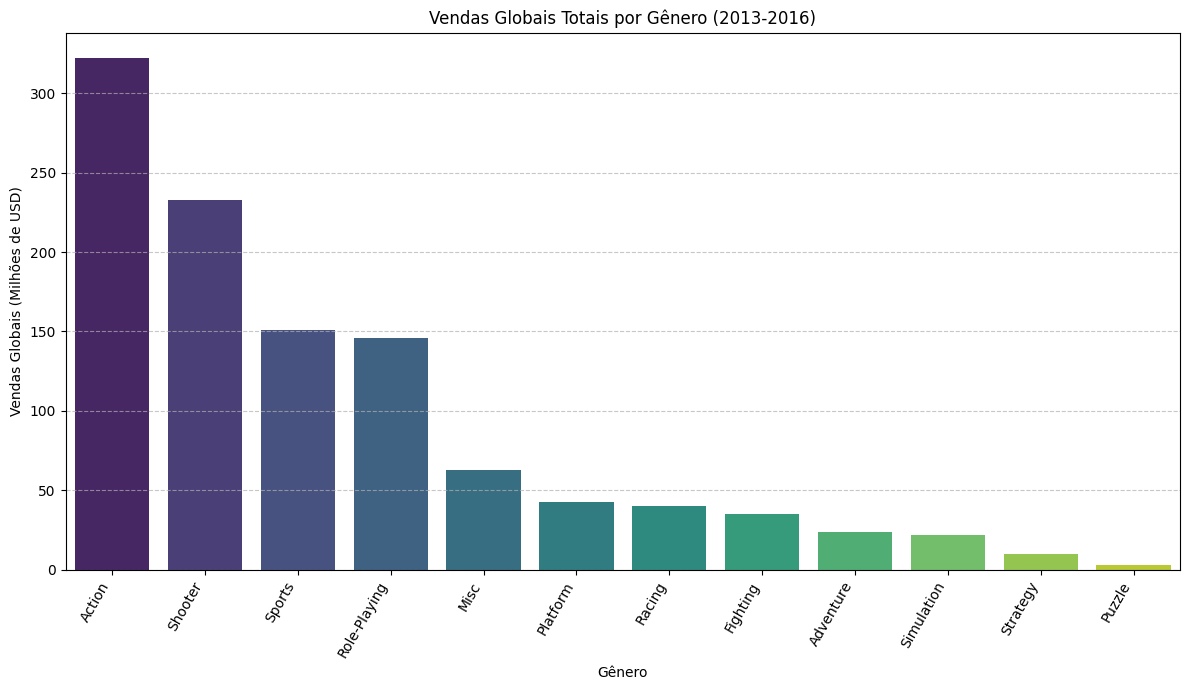


--- Vendas Médias por Jogo por Gênero no Período 2013-2016 (Milhões de USD): ---
genre
Shooter         1.245882
Sports          0.703972
Platform        0.576081
Role-Playing    0.499623
Racing          0.469294
Fighting        0.441375
Action          0.420196
Misc            0.405290
Simulation      0.350968
Puzzle          0.186471
Strategy        0.180000
Adventure       0.096490
Name: total_sales, dtype: float64


In [18]:
# Vendas totais por gênero no período relevante (2013-2016)
genre_sales = df_relevant.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

print("\n--- Vendas Totais por Gênero no Período 2013-2016 (Milhões de USD): ---")
print(genre_sales)

# Gráfico de barras para visualizar as vendas por gênero
plt.figure(figsize=(12, 7))
sns.barplot(x=genre_sales.index, y=genre_sales.values, palette='viridis')
plt.title('Vendas Globais Totais por Gênero (2013-2016)')
plt.xlabel('Gênero')
plt.ylabel('Vendas Globais (Milhões de USD)')
plt.xticks(rotation=60, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Vendas médias por gênero (para ver a lucratividade por jogo)
average_sales_per_genre = df_relevant.groupby('genre')['total_sales'].mean().sort_values(ascending=False)

print("\n--- Vendas Médias por Jogo por Gênero no Período 2013-2016 (Milhões de USD): ---")
print(average_sales_per_genre)

    Análise das Vendas Totais por Gênero:

    Action: Lidera disparado com $321.87 milhões. Este gênero é consistentemente o mais popular e com maior volume de vendas.

    Shooter: Segundo lugar com $232.98 milhões. Gêneros de tiro são extremamente populares e geram um volume de vendas muito alto.

    Sports: Terceiro com $150.65 milhões. Jogos de esporte, especialmente franquias anuais como FIFA e NBA 2K, garantem um fluxo de vendas constante e elevado

    Role-Playing: Quarto com $145.89 milhões. O gênero RPG, com seus jogos frequentemente extensos e imersivos, também é muito lucrativo.

    Os próximos gêneros (Misc, Platform, Racing, Fighting, Adventure, Simulation, Strategy, Puzzle) têm vendas totais significativamente menores em comparação com os quatro primeiros.


    Análise das Vendas Médias por Jogo por Gênero:

    Esta métrica é crucial para entender a "lucratividade" por título, e não apenas o volume total de vendas de muitos títulos.

    Shooter: $1.246 milhões por jogo. Este é o gênero com a maior venda média por jogo, o que significa que, em média, cada jogo de tiro lançado vende mais cópias do que jogos de qualquer outro gênero. Isso aponta para a força dos "blockbusters" de tiro (como Call of Duty).

    Sports: $0.704 milhões por jogo. Uma venda média alta, reforçando a rentabilidade das franquias de esporte.

    Platform: $0.576 milhões por jogo. Embora o volume total não seja tão alto, os jogos de plataforma que são lançados tendem a vender bem individualmente.

    Role-Playing: $0.499 milhões por jogo.

    Racing: $0.469 milhões por jogo.

    Fighting: $0.441 milhões por jogo.

    Action: $0.420 milhões por jogo. Surpreendentemente, apesar de ter as maiores vendas totais, o gênero Action tem uma venda média por jogo menor do que Shooter e Sports. Isso sugere que o gênero Action tem um volume muito maior de jogos lançados, incluindo muitos com vendas mais baixas, que puxam a média para baixo.

    Os gêneros Puzzle, Strategy e Adventure estão na parte inferior tanto em vendas totais quanto em vendas médias por jogo, indicando que são os menos lucrativos no período analisado.


    Generalizações sobre Gêneros com Vendas Altas e Baixas:

    Gêneros de Vendas Altas (e Lucrativos):

    Shooter e Sports são consistentemente os gêneros mais lucrativos, tanto em volume total de vendas quanto em vendas médias por jogo. Eles abrigam muitas das maiores franquias da indústria.

    Action e Role-Playing também geram um volume total de vendas muito alto. Embora o Action tenha uma média por jogo ligeiramente menor (devido ao grande número de lançamentos), esses gêneros são pilares do mercado.

    Jogos nesses gêneros frequentemente se beneficiam de grandes orçamentos, marketing intensivo e bases de fãs leais



    Gêneros de Vendas Baixas:

    Puzzle, Strategy e Adventure geralmente apresentam as vendas totais e médias por jogo mais baixas. Isso pode indicar um público-alvo menor ou um nicho mais específico, ou talvez um menor investimento em títulos de grande orçamento para esses gêneros.
Embora alguns títulos individuais em gêneros menores possam ser muito bem-sucedidos, a tendência geral é de menor lucratividade em comparação com os gêneros de ponta.


In [19]:
# Vamos calcular as vendas totais de cada plataforma em cada uma das três regiões
#(na_sales, eu_sales, jp_sales) no período relevante (2013-2016) e identificar as top 5 para cada uma.

# Vendas por plataforma por região no período relevante (2013-2016)

na_top_platforms = df_relevant.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
eu_top_platforms = df_relevant.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
jp_top_platforms = df_relevant.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

print("\n--- Top 5 Plataformas na América do Norte (NA) (Milhões de USD): ---")
print(na_top_platforms)

print("\n--- Top 5 Plataformas na Europa (EU) (Milhões de USD): ---")
print(eu_top_platforms)

print("\n--- Top 5 Plataformas no Japão (JP) (Milhões de USD): ---")
print(jp_top_platforms)




--- Top 5 Plataformas na América do Norte (NA) (Milhões de USD): ---
platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: na_sales, dtype: float64

--- Top 5 Plataformas na Europa (EU) (Milhões de USD): ---
platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: eu_sales, dtype: float64

--- Top 5 Plataformas no Japão (JP) (Milhões de USD): ---
platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64


Perfis de Usuário por Região:

    Análise das Cinco Principais Plataformas por Região (2013-2016):

    América do Norte (NA):

    PS4 ($108.74 milhões)
    XOne ($93.12 milhões)
    X360 ($81.66 milhões)
    PS3 ($63.50 milhões)
    3DS ($38.20 milhões)

    O mercado norte-americano é dominado por consoles de mesa, com PS4 e XOne liderando, seguidos de perto pelas plataformas da geração anterior (X360 e PS3). O XOne tem uma presença muito mais forte aqui em comparação com a Europa e, especialmente, o Japão.

    Europa (EU):

    PS4 ($141.09 milhões)
    PS3 ($67.81 milhões)
    XOne ($51.59 milhões)
    X360 ($42.52 milhões)
    3DS ($30.96 milhões)

    A Europa também é fortemente inclinada aos consoles de mesa. O PS4 tem uma liderança ainda mais dominante aqui do que na América do Norte, e o sistema PlayStation (PS4 e PS3) é particularmente forte. O XOne e X360 têm boa aceitação, mas com vendas menores que as da Sony.

    Japão (JP):

    3DS ($67.81 milhões)
    PS3 ($23.35 milhões)
    PSV ($18.59 milhões)
    PS4 ($15.96 milhões)
    WiiU ($10.88 milhões)

     O mercado japonês é distintamente diferente. É fortemente dominado por consoles portáteis, com o 3DS na liderança absoluta. O PSV (PlayStation Vita) também é uma plataforma portátil popular aqui, que nem aparece nas top 5 das outras regiões. O PS4 tem uma presença consideravelmente menor do que na NA e EU, e o Xbox (XOne, X360) não aparece entre os 5 primeiros, indicando uma penetração muito baixa. O WiiU também se mostra mais relevante aqui do que nas outras regiões.

    Principais Diferenças Regionais:

    América do Norte e Europa: Ambos os mercados são dominados por consoles de mesa da nova geração (PS4, XOne). No entanto, a Europa mostra uma preferência mais acentuada pelo PS4, enquanto a América do Norte tem um equilíbrio mais próximo entre PS4 e XOne e uma forte base instalada de X360.

    Japão: Este mercado se destaca por sua forte preferência por consoles portáteis (3DS, PSV) e uma menor adoção de consoles de mesa da nova geração (especialmente Xbox, mas também o PS4 em comparação com outros mercados). A Nintendo e o sistema portátil PlayStation são muito mais influentes aqui.

    

In [20]:
# Vamos calcular as vendas totais de cada gênero em cada uma das três regiões (na_sales,
# eu_sales, jp_sales) no período relevante (2013-2016) e identificar os top 5 para cada uma.

# Vendas por gênero por região no período relevante (2013-2016)
na_top_genres = df_relevant.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
eu_top_genres = df_relevant.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
jp_top_genres = df_relevant.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

print("\n--- Top 5 Gêneros na América do Norte (NA) (Milhões de USD): ---")
print(na_top_genres)

print("\n--- Top 5 Gêneros na Europa (EU) (Milhões de USD): ---")
print(eu_top_genres)

print("\n--- Top 5 Gêneros no Japão (JP) (Milhões de USD): ---")
print(jp_top_genres)








--- Top 5 Gêneros na América do Norte (NA) (Milhões de USD): ---
genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64

--- Top 5 Gêneros na Europa (EU) (Milhões de USD): ---
genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64

--- Top 5 Gêneros no Japão (JP) (Milhões de USD): ---
genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64


Análise dos Cinco Principais Gêneros por Região (2013-2016):

    América do Norte (NA):
    
    Action ($126.05 milhões)
    Shooter ($109.74 milhões)
    Sports ($65.27 milhões)
    Role-Playing ($46.40 milhões)
    Misc ($27.49 milhões)
    
    O mercado norte-americano tem uma clara preferência por gêneros de ação e tiro, com esportes e RPGs também sendo muito fortes. Isso reflete o domínio dos consoles de mesa e a popularidade de grandes franquias nesses gêneros.

    Europa (EU):

    Action ($118.13 milhões)
    Shooter ($87.86 milhões)
    Sports ($60.52 milhões)
    Role-Playing ($36.97 milhões)
    Racing ($20.19 milhões)

    O perfil europeu é bastante similar ao norte-americano, com Action, Shooter, Sports e Role-Playing no topo. A diferença notável é a presença de Racing entre os top 5, substituindo "Misc", o que pode indicar uma maior popularidade de jogos de corrida na Europa.

    Japão (JP):

    Role-Playing ($51.04 milhões)
    Action ($40.49 milhões)
    Misc ($9.20 milhões)
    Fighting ($7.65 milhões)
    Shooter ($6.61 milhões)

    O mercado japonês apresenta um perfil de gênero bem distinto. Role-Playing é o gênero dominante, refletindo a forte cultura de RPGs no Japão. O gênero Action ainda é forte, mas com vendas totais menores que nas outras regiões. Gêneros como Misc e Fighting aparecem no top 5 japonês, enquanto Shooter tem uma presença significativamente menor comparado à América do Norte e Europa. Isso se alinha com a preferência por plataformas portáteis e o estilo de jogo mais característico do Japão.

    Principais Diferenças Regionais nos Gêneros:

    América do Norte e Europa: Ambos os mercados são bastante parecidos, com uma forte inclinação para Action, Shooter e Sports. Esses são os "cavalo de batalha" para consoles de mesa ocidentais.
    
    Japão: Destaca-se a forte preferência por Role-Playing, a inclusão de Misc e Fighting no top 5, e uma menor predileção por Shooter em comparação com o Ocidente. Isso demonstra uma cultura de jogos com prioridades


    

In [21]:
# Vamos calcular as vendas totais para cada classificação ESRB 
# em cada uma das três regiões, no período relevante (2013-2016) 
# e ver quais são as classificações dominantes.

# Vendas por rating por região no período relevante (2013-2016)
na_sales_by_rating = df_relevant.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
eu_sales_by_rating = df_relevant.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
jp_sales_by_rating = df_relevant.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

print("\n--- Vendas por Classificação ESRB na América do Norte (NA) (Milhões de USD): ---")
print(na_sales_by_rating)

print("\n--- Vendas por Classificação ESRB na Europa (EU) (Milhões de USD): ---")
print(eu_sales_by_rating)

print("\n--- Vendas por Classificação ESRB no Japão (JP) (Milhões de USD): ---")
print(jp_sales_by_rating)




--- Vendas por Classificação ESRB na América do Norte (NA) (Milhões de USD): ---
rating
M            165.21
No Rating     89.42
E             79.05
E10+          54.24
T             49.79
Name: na_sales, dtype: float64

--- Vendas por Classificação ESRB na Europa (EU) (Milhões de USD): ---
rating
M            145.32
E             83.36
No Rating     78.91
E10+          42.69
T             41.95
Name: eu_sales, dtype: float64

--- Vendas por Classificação ESRB no Japão (JP) (Milhões de USD): ---
rating
No Rating    85.05
T            20.59
E            15.14
M            14.11
E10+          5.89
Name: jp_sales, dtype: float64


Análise da Influência das Classificações ESRB nas Vendas por Região (2013-2016):

    América do Norte (NA):
    
    M (Mature - Adulto): $165.21 milhões
    No Rating (Sem Classificação): $89.42 milhões
    E (Everyone - Para Todos): $79.05 milhões
    E10+ (Everyone 10+ - Para Todos 10+): $54.24 milhões
    T (Teen - Adolescente): $49.79 milhões

    Nos EUA, jogos com classificação M são os que mais vendem. Isso reflete a popularidade de jogos de tiro e ação que frequentemente recebem essa classificação. Jogos sem classificação e para "Todos" também têm um volume significativo

    Europa (EU):

    M (Mature - Adulto): $145.32 milhões
    E (Everyone - Para Todos): $83.36 milhões
    No Rating (Sem Classificação): $78.91 milhões
    E10+ (Everyone 10+ - Para Todos 10+): $42.69 milhões
    T (Teen - Adolescente): $41.95 milhões

    O padrão europeu é muito similar ao norte-americano. A classificação M também domina, seguida por E e No Rating. Isso sugere que os gostos por conteúdo maduro (ação, tiro) são consistentes nesses dois mercados ocidentais.

    Japão (JP):

    No Rating (Sem Classificação): $85.05 milhões
    T (Teen - Adolescente): $20.59 milhões
    E (Everyone - Para Todos): $15.14 milhões
    M (Mature - Adulto): $14.11 milhões
    E10+ (Everyone 10+ - Para Todos 10+): $5.89 milhões

    O Japão mostra um cenário drasticamente diferente. A maioria das vendas vem de jogos que não possuem classificação ESRB (No Rating). Isso ocorre porque o Japão usa seu próprio sistema de classificação (CERO) e muitos jogos japoneses talvez não sejam classificados pelo ESRB se não forem lançados nos EUA/Europa. Entre os classificados, as classificações T (Teen) e E (Everyone) são mais proeminentes do que a M (Mature), que tem vendas relativamente baixas. Isso se alinha com a preferência japonesa por RPGs e jogos portáteis, que tendem a ter classificações menos restritivas.


    Principais Diferenças Regionais nas Classificações ESRB:

    Ocidente (NA e EU): Ambos os mercados são fortemente impulsionados por jogos com classificação M (Mature), indicando uma preferência por conteúdo mais adulto (ação, tiro, aventura madura).

    Japão: Este mercado é dominado por jogos sem classificação ESRB (provavelmente usando CERO) e, entre os classificados pela ESRB, as vendas são maiores para jogos com classificações T (Teen) e E (Everyone). Isso reflete uma cultura de jogos diferente, com maior foco em gêneros que não necessariamente exigem classificações "M".



    Conclusões da Etapa 4:

    Plataformas: América do Norte e Europa são dominadas por PS4 e XOne (com PS4 liderando na EU e XOne mais forte na NA). O Japão é único, com dominância do 3DS e PSV, e menor presença de consoles de mesa.

    Gêneros: América do Norte e Europa preferem Ação, Tiro e Esportes. O Japão prefere fortemente RPGs, com Ação e Luta também presentes, mas Tiro com menos destaque.

    Classificações ESRB: América do Norte e Europa têm as vendas impulsionadas principalmente por jogos "M" (Mature). O Japão se concentra em jogos "No Rating" e tem uma preferência por classificações "T" e "E" em detrimento de "M".
    

Etapa 5
  
  Eu escolho um nível de significância (α) de 0.05 (ou 5%)
  Pois 0.05 é o limiar mais comumente aceito e utilizado em muitas áreas de pesquisa.

  Agora, vamos formular e testar as duas hipóteses. 
  Para ambos os testes, usaremos um teste t para duas amostras independentes,
pois estamos comparando as médias de duas populações diferentes (e não pareadas).


Hipótese 1: As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.

    Hipotese Nula: As classificações médias dos usuários para jogos no Xbox One são iguais às classificações médias dos usuários para jogos no PC.

    Hipótese Alternativa: As classificações médias dos usuários para jogos no Xbox One são diferentes das classificações médias dos usuários para jogos no PC.

    Este é um teste bicaudal, pois estamos interessados em saber se as médias são diferentes, para mais ou para menos.


In [22]:
# Hipótese 1
# As classificações médias de usuários para Xbox One e PC são diferentes.

# Vamos remover os NaNs das colunas de score antes do teste, pois o t-test não os lida.
# Filtrar os scores de usuário para Xbox One e PC, removendo NaNs
xone_scores = df_relevant[df_relevant['platform'] == 'XOne']['user_score'].dropna()
pc_scores = df_relevant[df_relevant['platform'] == 'PC']['user_score'].dropna()

print(f"\n--- Dados para Teste de Hipótese 1 ---")
print(f"Número de amostras XOne: {len(xone_scores)}")
print(f"Média XOne: {xone_scores.mean():.2f}")
print(f"Variância XOne: {xone_scores.var():.2f}") # Adicionado Variância
print(f"Número de amostras PC: {len(pc_scores)}")
print(f"Média PC: {pc_scores.mean():.2f}")
print(f"Variância PC: {pc_scores.var():.2f}") # Adicionado Variância

# --- Verificação da Igualdade de Variâncias (Teste de Levene) ---
print(f"\n--- Verificação da Igualdade de Variâncias (Teste de Levene) ---")
statistic_levene, p_value_levene = stats.levene(xone_scores, pc_scores)
print(f"Estatística de Levene: {statistic_levene:.2f}")
print(f"Valor p (Levene): {p_value_levene:.4f}")

alpha_levene = 0.05
if p_value_levene < alpha_levene:
    print(f"Com p-value ({p_value_levene:.4f}) menor que alfa ({alpha_levene}), rejeitamos a hipótese nula do Teste de Levene.")
    print("Conclusão: As variâncias das classificações de usuários para Xbox One e PC são significativamente diferentes.")
    equal_variances = False
else:
    print(f"Com p-value ({p_value_levene:.4f}) maior ou igual a alfa ({alpha_levene}), não rejeitamos a hipótese nula do Teste de Levene.")
    print("Conclusão: Não há evidências estatísticas suficientes para sugerir que as variâncias das classificações de usuários para Xbox One e PC são diferentes (podemos considerá-las iguais).")
    equal_variances = True

# --- Realizar o teste t de duas amostras independentes ---

t_statistic_1, p_value_1 = stats.ttest_ind(xone_scores, pc_scores, equal_var=equal_variances)

print(f"\n--- Resultado do Teste de Hipótese 1 ---")
print(f"Estatística t: {t_statistic_1:.2f}")
print(f"Valor p: {p_value_1:.4f}")

# Interpretar o resultado do Teste t
alpha_ttest = 0.05 
if p_value_1 < alpha_ttest:
    print(f"Com p-value ({p_value_1:.4f}) menor que alfa ({alpha_ttest}), rejeitamos a hipótese nula.")
    print("Conclusão: Há evidências estatísticas para sugerir que as classificações médias de usuários para Xbox One e PC são diferentes.")
else:
    print(f"Com p-value ({p_value_1:.4f}) maior ou igual a alfa ({alpha_ttest}), não rejeitamos a hipótese nula.")
    print("Conclusão: Não há evidências estatísticas suficientes para sugerir que as classificações médias de usuários para Xbox One e PC são diferentes.")


--- Dados para Teste de Hipótese 1 ---
Número de amostras XOne: 182
Média XOne: 6.52
Variância XOne: 1.91
Número de amostras PC: 155
Média PC: 6.27
Variância PC: 3.04

--- Verificação da Igualdade de Variâncias (Teste de Levene) ---
Estatística de Levene: 8.45
Valor p (Levene): 0.0039
Com p-value (0.0039) menor que alfa (0.05), rejeitamos a hipótese nula do Teste de Levene.
Conclusão: As variâncias das classificações de usuários para Xbox One e PC são significativamente diferentes.

--- Resultado do Teste de Hipótese 1 ---
Estatística t: 1.45
Valor p: 0.1476
Com p-value (0.1476) maior ou igual a alfa (0.05), não rejeitamos a hipótese nula.
Conclusão: Não há evidências estatísticas suficientes para sugerir que as classificações médias de usuários para Xbox One e PC são diferentes.


Hipótese 2: As classificações médias de usuários para os gêneros Action e Sports são diferentes.

    Hipótese Nula: As classificações médias dos usuários para jogos do gênero Action são iguais às classificações médias dos usuários para jogos do gênero Sports.

    Hipótese Alternativa: As classificações médias dos usuários para jogos do gênero Action são diferentes das classificações médias dos usuários para jogos do gênero Sports.

    Este também é um teste bicaudal.

    

In [23]:
# Hipótese 2
# As classificações médias de usuários para os gêneros Action e Sports são diferentes.

# Filtrar os scores de usuário para os gêneros Action e Sports, removendo NaNs
action_scores = df_relevant[df_relevant['genre'] == 'Action']['user_score'].dropna()
sports_scores = df_relevant[df_relevant['genre'] == 'Sports']['user_score'].dropna()

print(f"\n--- Dados para Teste de Hipótese 2 ---")
print(f"Número de amostras Action: {len(action_scores)}")
print(f"Média Action: {action_scores.mean():.2f}")
print(f"Variância Action: {action_scores.var():.2f}") # Adicionado Variância
print(f"Número de amostras Sports: {len(sports_scores)}")
print(f"Média Sports: {sports_scores.mean():.2f}")
print(f"Variância Sports: {sports_scores.var():.2f}") # Adicionado Variância

# --- Verificação da Igualdade de Variâncias (Teste de Levene) ---
print(f"\n--- Verificação da Igualdade de Variâncias (Teste de Levene) ---")
statistic_levene_2, p_value_levene_2 = stats.levene(action_scores, sports_scores)
print(f"Estatística de Levene: {statistic_levene_2:.2f}")
print(f"Valor p (Levene): {p_value_levene_2:.4f}")

alpha_levene = 0.05
if p_value_levene_2 < alpha_levene:
    print(f"Com p-value ({p_value_levene_2:.4f}) menor que alfa ({alpha_levene}), rejeitamos a hipótese nula do Teste de Levene.")
    print("Conclusão: As variâncias das classificações de usuários para os gêneros Action e Sports são significativamente diferentes.")
    equal_variances_2 = False
else:
    print(f"Com p-value ({p_value_levene_2:.4f}) maior ou igual a alfa ({alpha_levene}), não rejeitamos a hipótese nula do Teste de Levene.")
    print("Conclusão: Não há evidências estatísticas suficientes para sugerir que as variâncias das classificações de usuários para os gêneros Action e Sports são diferentes (podemos considerá-las iguais).")
    equal_variances_2 = True

# --- Realizar o teste t de duas amostras independentes ---

t_statistic_2, p_value_2 = stats.ttest_ind(action_scores, sports_scores, equal_var=equal_variances_2)

print(f"\n--- Resultado do Teste de Hipótese 2 ---")
print(f"Estatística t: {t_statistic_2:.2f}")
print(f"Valor p: {p_value_2:.4f}")

# Interpretar o resultado do Teste t
alpha_ttest = 0.05
if p_value_2 < alpha_ttest:
    print(f"Com p-value ({p_value_2:.4f}) menor que alfa ({alpha_ttest}), rejeitamos a hipótese nula.")
    print("Conclusão: Há evidências estatísticas para sugerir que as classificações médias de usuários para os gêneros Action e Sports são diferentes.")
else:
    print(f"Com p-value ({p_value_2:.4f}) maior ou igual a alfa ({alpha_ttest}), não rejeitamos a hipótese nula.")
    print("Conclusão: Não há evidências estatísticas suficientes para sugerir que as classificações médias de usuários para os gêneros Action e Sports são diferentes.")


--- Dados para Teste de Hipótese 2 ---
Número de amostras Action: 389
Média Action: 6.84
Variância Action: 1.77
Número de amostras Sports: 160
Média Sports: 5.24
Variância Sports: 3.18

--- Verificação da Igualdade de Variâncias (Teste de Levene) ---
Estatística de Levene: 26.21
Valor p (Levene): 0.0000
Com p-value (0.0000) menor que alfa (0.05), rejeitamos a hipótese nula do Teste de Levene.
Conclusão: As variâncias das classificações de usuários para os gêneros Action e Sports são significativamente diferentes.

--- Resultado do Teste de Hipótese 2 ---
Estatística t: 10.23
Valor p: 0.0000
Com p-value (0.0000) menor que alfa (0.05), rejeitamos a hipótese nula.
Conclusão: Há evidências estatísticas para sugerir que as classificações médias de usuários para os gêneros Action e Sports são diferentes.


Resultados dos Testes de Hipóteses:

Hipótese 1: As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.

    Dados:
   
    Média de Avaliação de Usuários XOne: 6.52 (baseado em 182 amostras)
    Média de Avaliação de Usuários PC: 6.27 (baseado em 155 amostras)

    Resultado do Teste t:
    
    Estatística t: 1.45
    Valor p: 0.1476

    Conclusão:
    
    Com um valor p (0.1476) maior que o nível de significância α (0.05), não rejeitamos a hipótese nula.

    Isso significa que não há evidências estatísticas suficientes para sugerir que as classificações médias de usuários para jogos no Xbox One e no PC são diferentes. Embora haja uma pequena diferença nas médias amostrais, essa diferença pode ser atribuída ao acaso e não é estatisticamente significativa. Para fins práticos, podemos considerar que a satisfação média dos usuários em relação aos jogos é similar nessas duas plataformas.


Hipótese 2: As classificações médias de usuários para os gêneros Action e Sports são diferentes.

    Dados:

    Média de Avaliação de Usuários Action: 6.84 (baseado em 389 amostras)
    Média de Avaliação de Usuários Sports: 5.24 (baseado em 160 amostras)

    Resultado do Teste t:

    Estatística t: 10.23
    Valor p: 0.0000 (muito próximo de zero)

    Conclusão:

    Com um valor p (0.0000) muito menor que o nível de significância α (0.05), rejeitamos a hipótese nula.
    Isso significa que há evidências estatísticas muito fortes para sugerir que as classificações médias de usuários para os gêneros Action e Sports são significativamente diferentes. A grande diferença observada nas médias amostrais (6.84 para Action vs. 5.24 para Sports) é estatisticamente significativa e provavelmente reflete uma diferença real na forma como os usuários avaliam os jogos nesses dois gêneros. Gêneros de Ação tendem a ter avaliações de usuário médias mais altas do que gêneros de Esportes.

    

Recomendações Finais para 2017:

    Com base em todas as análises realizadas, as seguintes recomendações estratégicas são propostas para a loja de jogos online:

    Foco em Plataformas de Nova Geração:

    Prioridade Absoluta: Concentrar a maioria dos esforços de marketing e aquisição de jogos em títulos para PS4 e Xbox One. Essas plataformas são o presente e o futuro próximo do mercado de consoles de mesa.

    Reduzir Investimento em Geração Antiga: Diminuir drasticamente o estoque e os esforços de marketing para jogos de PS3 e Xbox 360, pois suas vendas estão em declínio acentuado.

    Estratégias de Gêneros Específicas:

    Pilares de Vendas: Investir pesadamente em jogos dos gêneros Action, Shooter, Sports e Role-Playing. Esses são os mais lucrativos e populares globalmente.
    
    Oportunidades em Gêneros de Alta Média: Promover fortemente os jogos de Shooter e Sports que têm alta média de vendas por título, buscando parcerias com franquias consagradas.
    
    Nicho de Mercado para Gêneros Menores: Para gêneros com vendas mais baixas (Puzzle, Strategy, Adventure), considerar uma estratégia de nicho ou apenas adquirir títulos de alta qualidade e baixo risco.

    Adaptação Regional é Crucial:

    Mercados Ocidentais (NA e EU):
    
    Continuar a forte promoção de títulos M (Mature).
    
    Focar em PS4 (com vantagem na Europa) e Xbox One (com maior paridade na América do Norte).
 
    Manter a ênfase em Action, Shooter e Sports.

    Mercado Japonês (JP):
    
    Foco em Consoles Portáteis: Dar prioridade a jogos para Nintendo 3DS e PlayStation Vita.
    
    Preferência de Gêneros: Investir em títulos de Role-Playing, Action (mas com nuances locais), Misc e Fighting.
    
    Classificação: Estar ciente de que jogos sem classificação ESRB (CERO) e com classificações T/E são mais populares.

    Uso Inteligente das Avaliações:

    Atenção aos Críticos: A loja deve prestar mais atenção às avaliações de críticos ao selecionar novos títulos e ao planejar campanhas de marketing, pois elas têm uma correlação mais forte com as vendas.
    
    Cautela com Usuários: As avaliações de usuários devem ser vistas como um complemento, mas não como um preditor primário de vendas. Não se deve descartar um jogo com base apenas em uma média de usuário não tão alta, pois a correlação com vendas é fraca.
    
    Diferenças de Gênero: Ao promover jogos, reconhecer que a satisfação média dos usuários para jogos de Ação é geralmente maior do que para jogos de Esportes.

    Estratégia de Lançamento:

    Para 2017, concentrar-se em lançamentos mais recentes para as plataformas de nova geração, pois a vida útil relevante dos jogos em gerações antigas é curta.

